clustering : 군집화 (특징이 유사한 데이터끼리 묶어줌)

- kmeans : 분할 기반 클러스터링

In [7]:
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans


In [8]:
# kmean : k개의 평균을 구한다.
iris = load_iris()

# 우리는 지금 iris datasets 에서 target이 없다고 가정!
iris_target_names = list(map(lambda x: "_".join(x.split(" ")[:-1]), iris.feature_names))

iris_df = pd.DataFrame(iris.data, columns=iris_target_names)
iris_df

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [9]:
# n_clusters : 몇개의 클래스로 군집으로 만들건지
model = KMeans(n_clusters=3, n_init="auto", random_state=1)

In [10]:
model.fit(iris_df)

KMeans(n_clusters=3, random_state=1)

In [11]:
# 각 데이터의 라벨링 (0/1/2 로 나타낸다)
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
# 중심점 좌표 : 각 클러스터의 중심점을 보여준다.
model.cluster_centers_

array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

In [ ]:
# 데이터와 클러스 중심까지의 거리 합 : 작을수록 군집이 좋다
model.inertia_

78.8556658259773

In [14]:
predict = model.predict(iris_df)

In [ ]:
# 원래는 y값(타겟)을 모르지만 비교해보자
iris_df["target"] = iris.target
iris_df["predict"] = predict
iris_df

sepal_length  sepal_width  petal_length  petal_width  target  predict
0             5.1          3.5           1.4          0.2       0        1
1             4.9          3.0           1.4          0.2       0        1
2             4.7          3.2           1.3          0.2       0        1
3             4.6          3.1           1.5          0.2       0        1
4             5.0          3.6           1.4          0.2       0        1
..            ...          ...           ...          ...     ...      ...
145           6.7          3.0           5.2          2.3       2        2
146           6.3          2.5           5.0          1.9       2        0
147           6.5          3.0           5.2          2.0       2        2
148           6.2          3.4           5.4          2.3       2        2
149           5.9          3.0           5.1          1.8       2        0

[150 rows x 6 columns]

In [ ]:
# 타겟과 프레딕트와 일치하는 갯수가 많을 수록 잘 맞췄다 라고 추론한다.
# 저렇게 군집화 시켰구나... 라고 이해
iris_df.groupby(["target", "predict"])["sepal_length"].count()

target  predict
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64

적절한 k개의 찾는 두가지 방법

1. elbow graph
2. silhouette cofficient

In [19]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [20]:
# 2차원으로 바꿔서 시각화
iris_pca = PCA(n_components=2).fit_transform(iris.data)

iris_df["pca_1"] = iris_pca[:,0]
iris_df["pca_2"] = iris_pca[:,1]

iris_df

sepal_length  sepal_width  petal_length  ...  predict     pca_1     pca_2
0             5.1          3.5           1.4  ...        1 -2.684126  0.319397
1             4.9          3.0           1.4  ...        1 -2.714142 -0.177001
2             4.7          3.2           1.3  ...        1 -2.888991 -0.144949
3             4.6          3.1           1.5  ...        1 -2.745343 -0.318299
4             5.0          3.6           1.4  ...        1 -2.728717  0.326755
..            ...          ...           ...  ...      ...       ...       ...
145           6.7          3.0           5.2  ...        2  1.944110  0.187532
146           6.3          2.5           5.0  ...        0  1.527167 -0.375317
147           6.5          3.0           5.2  ...        2  1.764346  0.078859
148           6.2          3.4           5.4  ...        2  1.900942  0.116628
149           5.9          3.0           5.1  ...        0  1.390189 -0.282661

[150 rows x 8 columns]

In [24]:
# [iris_df["predict"]가 i 번째 일때 트루인 인덱스를 찾겠다.
marker_idx = [iris_df[iris_df["predict"] == i].index for i in range(3)]
markers = ["^", "s", "o"]

for i in range(len(marker_idx)):
    plt.scatter(x=iris_df.loc[marker_idx[i], "pca_1"],
                y=iris_df.loc[marker_idx[i], "pca_2"],
                marker=markers[i]
                )
plt.show()

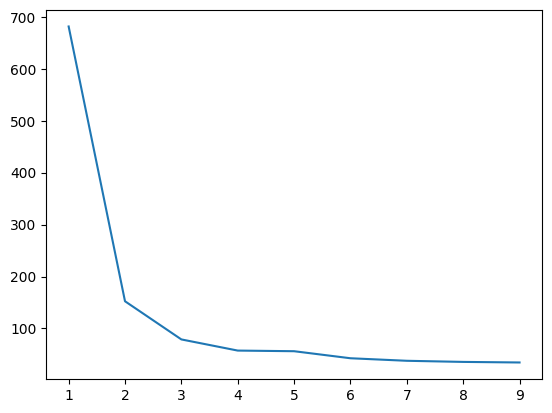

In [ ]:
# 몇개의 y를 만들지 알아야 한다.

inertia_list = list()

for i in range(1, 10):
    model = KMeans(n_clusters=i, n_init="auto", random_state=1)
    model.fit(iris.data)
    inertia_list.append(model.inertia_)

# x: cluster 갯수
# y : inertia 값
#  elbow graph : 적절한 k의 값을 찾기 위해 k를 변화 시켜보자.
#  -> inertia 의 변화가 급격한 부분이 적절한 k이다!!
# 중심까지의 변화가 어떻게 되는데?
plt.plot(range(1, 10), inertia_list)

In [29]:
# 평가 지표를 확인해 보자
from sklearn.metrics import silhouette_samples,silhouette_score

In [31]:
# silhouette_samples : 데이터 각각의 실루엣 계수
# silhouette coefficient : (실루엣 계수) 각 군집간의 거리가 얼마나  효율적으로 분리되었는지 판별
# (값이 높을수록 좋다)

silhouette_coef = silhouette_samples(iris.data, iris_df["predict"])
iris_df["silhouette_coef"] = silhouette_coef
iris_df

sepal_length  sepal_width  ...  silhouette_cofe  silhouette_coef
0             5.1          3.5  ...         0.852582         0.852582
1             4.9          3.0  ...         0.814916         0.814916
2             4.7          3.2  ...         0.828797         0.828797
3             4.6          3.1  ...         0.804352         0.804352
4             5.0          3.6  ...         0.848918         0.848918
..            ...          ...  ...              ...              ...
145           6.7          3.0  ...         0.424561         0.424561
146           6.3          2.5  ...         0.103125         0.103125
147           6.5          3.0  ...         0.316810         0.316810
148           6.2          3.4  ...         0.347855         0.347855
149           5.9          3.0  ...         0.187423         0.187423

[150 rows x 10 columns]

In [ ]:
silhouette_avg = silhouette_score(iris.data, iris_df["predict"])

# silhouette_score : 전체 데이터의 실루엣 계수 평균
silhouette_avg
# 높을수록 좋다

0.5511916046195919

In [34]:
silhouette_score_list = list()

for i in range(2, 10):
    model = KMeans(n_clusters=i, n_init="auto", random_state=1)
    model.fit(iris.data)
    silhouette_score_list.append(silhouette_score(iris.data, model.labels_))

silhouette_score_list

[0.6810461692117462,
 0.5511916046195919,
 0.49535632852884987,
 0.44207674329916935,
 0.44246301094842505,
 0.4609474109834491,
 0.4513998322873971,
 0.4178499703646081]

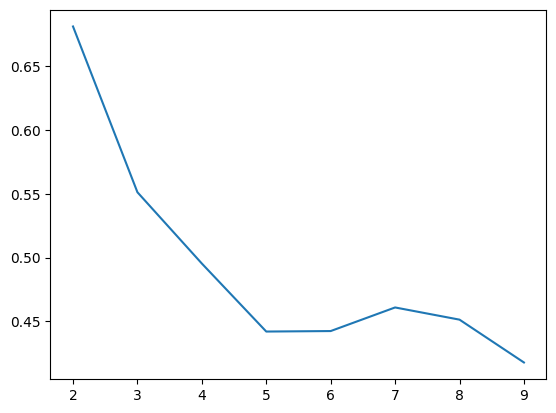

In [ ]:
# y를 두개인 경우에 더 잘나타나는 것 같아.
# 점수가 언제가 가장 높을까?
plt.plot(range(2, 10), silhouette_score_list)

In [36]:
import numpy as np

def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm 
    import math
    
    n_cols = len(cluster_lists)

    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
          
    for ind, n_cluster in enumerate(cluster_lists):
        
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

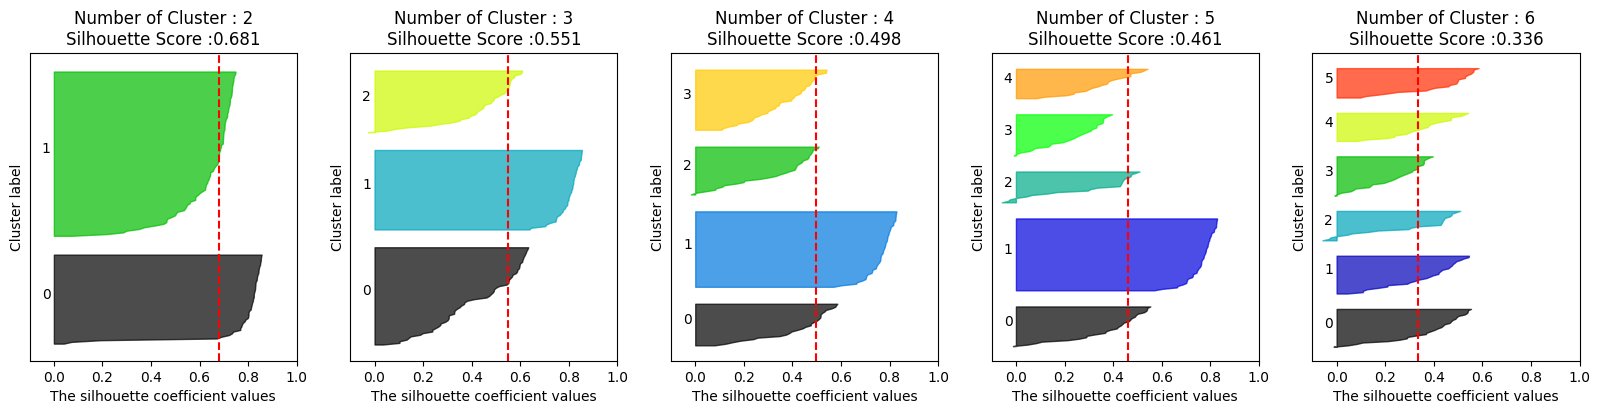

In [ ]:
visualize_silhouette([2, 3, 4, 5, 6], iris.data)
# 점선은 평균, 
# Silhouette Score 가 가장 높은 것은 2개로 나눌때 가장 스코어가 높다.